In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import scipy 

In [2]:
path = r"C:\Users\hp\08-08-2024 Instacart Basket Analysis"

In [5]:
df_cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods.pkl'))

In [7]:
df_cust_ords_prods.shape

(32404859, 29)

In [9]:
df_cust_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32642450 entries, 0 to 32642449
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 float64
 1   first_name              object 
 2   last name               object 
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   number of dependants    int64  
 8   family_status           object 
 9   income                  int64  
 10  product_id              float64
 11  product_name            object 
 12  aisle_id                float64
 13  department_id           float64
 14  prices                  float32
 15  order_id                float64
 16  order_number            float64
 17  order_dow               float64
 18  order_hour_of_day       float64
 19  days_since_prior_order  float16
 20  add_to_cart_order       float16
 21  reordered               float

In [11]:
#changing the data type to reduce the size of the file
df_cust_ords_prods = df_cust_ords_prods.astype({
    'order_id': 'float64',
    'user_id': 'float64',
    'order_number': 'float64',
    'order_dow': 'int16',
    'order_hour_of_day': 'int16',
    'days_since_prior_order': 'float16',
    'product_id': 'float64',
    'product_name': 'object',
    'aisle_id': 'float32',
    'department_id': 'float16',
    'prices': 'float32',
    'add_to_cart_order': 'float16',
    'reordered': 'float16',
    'first_name': 'object',
    'last_name': 'object',
    'gender': 'object',
    'state': 'object',
    'age': 'int16',
    'date_joined': 'object',
    'dependants': 'int16',
    'family_status': 'object',
    'income': 'int32',
    'Average_order': 'float32',
    'Max_order': 'float32',
    'loyalty_flag': 'object',
    'mean_product_price': 'float32',
    'spending_flag': 'object',
    'order_median': 'float16',
    'order_frequency': 'object',
        
    })

In [12]:
df_cust_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 float64
 1   first_name              object 
 2   last_name               object 
 3   gender                  object 
 4   state                   object 
 5   age                     int16  
 6   date_joined             object 
 7   dependants              int16  
 8   family_status           object 
 9   income                  int32  
 10  product_id              float64
 11  product_name            object 
 12  aisle_id                float32
 13  department_id           float16
 14  prices                  float32
 15  order_id                float64
 16  order_number            float64
 17  order_dow               int16  
 18  order_hour_of_day       int16  
 19  days_since_prior_order  float16
 20  add_to_cart_order       float16
 21  reordered               float

## 1. Descriptive findings about sales during the hour of day

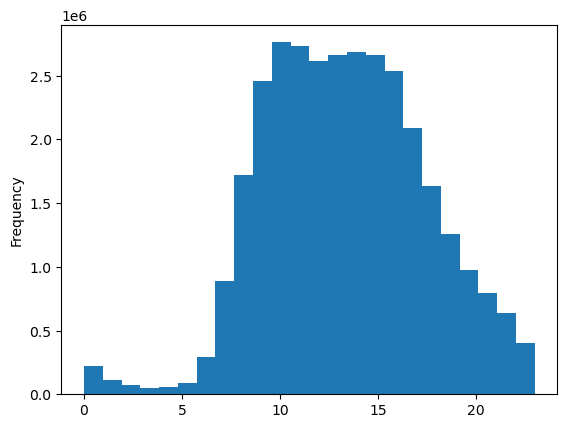

In [19]:
hist_sales_hr = df_cust_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

In [17]:
#customers orders starts to increase around 9:30AM. Peak orders are between 10AM to 4PM. It means that customers place orders during the work hours.

In [69]:
hist_sales_hr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour.png'))

## 2. Bar chart from the “loyalty_flag” column

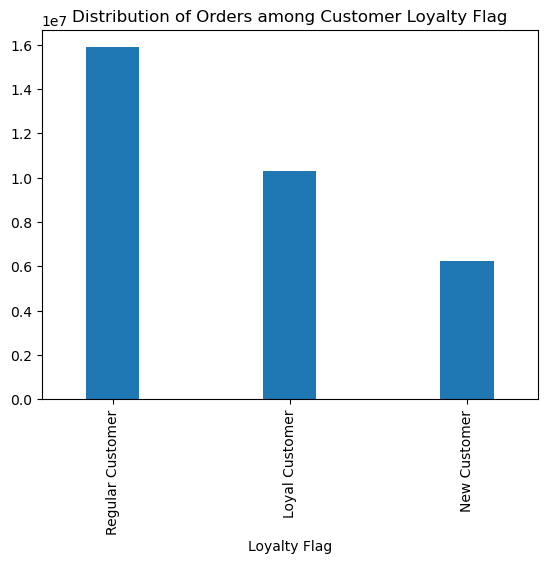

In [23]:
bar_loyalty = df_cust_ords_prods['loyalty_flag'].value_counts().plot.bar(
    width = 0.3,
    title = 'Distribution of Orders among Customer Loyalty Flag',
    xlabel = 'Loyalty Flag'
                                                            
)

In [25]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_part2.png'))

## 3. Expenditure vs Hour of the day - Line chart

In [27]:
# creating subset
np.random.seed(4)
dev = np.random.rand(len(df_cust_ords_prods)) <= 0.7

In [29]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
big = df_cust_ords_prods[dev] # store 70% of sample in the dataframe big

In [32]:
small = df_cust_ords_prods[~dev] # store 30% of sample in the dataframe small

In [35]:
len(df_cust_ords_prods)

32404859

In [37]:
df_line = small [['order_hour_of_day', 'prices']]

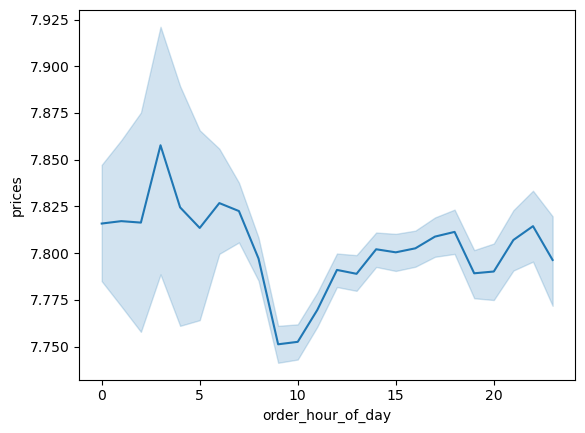

In [39]:
line = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

In [41]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_expenditure_part2.png'))

## 4. Connections between age and number of dependents

In [47]:
df_line_fam = small [['age', 'dependants']]

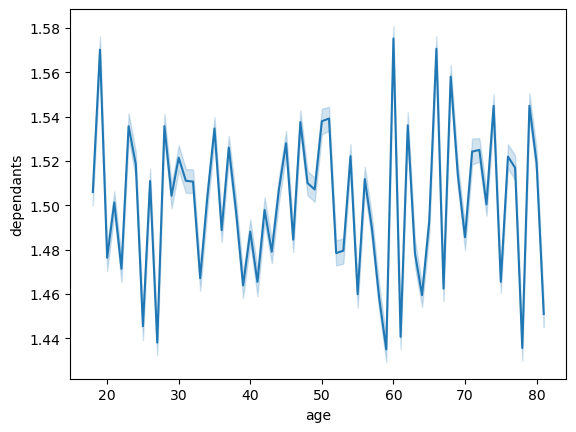

In [53]:
line_age = sns.lineplot(data = df_line_fam, x = 'age', y = 'dependants')

There are no clear pattern between age and number of dependants that we can determine from the above line chart. 

In [62]:
line_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_4.9.2.png'))

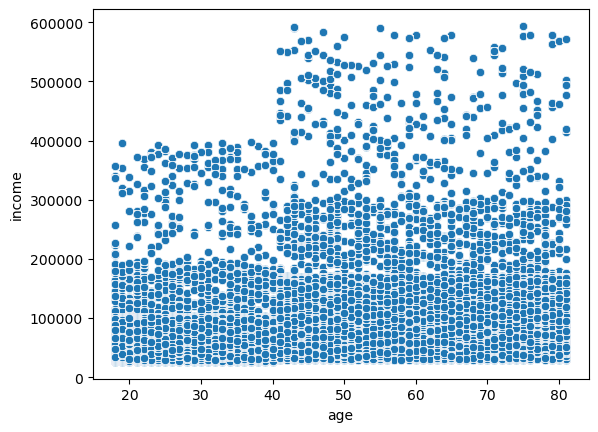

In [57]:
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df_cust_ords_prods)

The pattern identified in the scatter chart suggests that for individuals aged 40 and above, incomes generally exceed 400k. In contrast, those in the 20 to 40 age range do not seem to have incomes above 400k. This observation could point to the possibility that higher income levels are typically reached later in life, perhaps due to career progression, experience, or other factors that contribute to increased earning potential as one ages.

In [61]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_income_4.9.2.png'))